# Import

In [2]:
from src.GDA import GDA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as SklearnLDA
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.decomposition import PCA

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Function to compare GMM Discriminant Analysis with Sklearn LDA
def compare_gmm_lda(X_train, X_test, y_train, y_test, gda_components=2, lda_components=2):
    # 1. GMM Discriminant Analysis
    gmm_classifier = GDA(n_components=gda_components)
    gmm_classifier.fit(X_train, y_train)
    y_pred_gmm = gmm_classifier.predict(X_test)
    accuracy_gmm = accuracy_score(y_test, y_pred_gmm)

    # 2. Sklearn LDA for comparison
    lda_sklearn = SklearnLDA(n_components=lda_components)
    lda_sklearn.fit(X_train, y_train)
    y_pred_lda = lda_sklearn.predict(X_test)
    accuracy_lda = accuracy_score(y_test, y_pred_lda)

    # 3. Plot the results
    plt.figure(figsize=(10, 5))

    # GMM Discriminant Analysis Plot
    plt.subplot(1, 2, 1)
    plt.title(f"GMM Discriminant Analysis (Accuracy: {accuracy_gmm:.4f})")
    for cls in np.unique(y_train):
        plt.scatter(X_test[y_test == cls, 0], X_test[y_test == cls, 1], label=f"Class {cls}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    # Sklearn LDA Plot
    plt.subplot(1, 2, 2)
    plt.title(f"Sklearn LDA (Accuracy: {accuracy_lda:.4f})")
    for cls in np.unique(y_train):
        plt.scatter(X_test[y_test == cls, 0], X_test[y_test == cls, 1], label=f"Class {cls}")
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    plt.legend()

    plt.tight_layout()
    plt.show()




## Alzheimer tests

In [5]:
alzheimer_df = pd.read_table(
    "./data/alzheimer/Alzheimer_Webster.txt", header=0, sep=" "
)
target = "Y"
pca = PCA(n_components=50)
X = pca.fit_transform(alzheimer_df.drop(columns=[target]))
y = alzheimer_df["Y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
lda = SklearnLDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

In [8]:
accuracies, lda_acc = [], []
pca_range = range(20, 350, 10)
gmm_range = range(1, 10)
for pca_c in pca_range:
    accuracies.append([])
    pca = PCA(n_components=pca_c)
    X = pca.fit_transform(alzheimer_df.drop(columns=[target]))
    for components in gmm_range:
        gda = GDA(n_components=components)
        skf = StratifiedKFold(n_splits=4)
        accuracies[-1].append(0)
        for train_index, test_index in skf.split(X, y):
            gda.fit(X[train_index, :], y[train_index])
            y_pred = gda.predict(X[test_index, :])

            accuracies[-1][-1] += 1/4 * accuracy_score(y_pred, y[test_index])
accuracy_df = pd.DataFrame(accuracies, index=pca_range, columns=gmm_range)


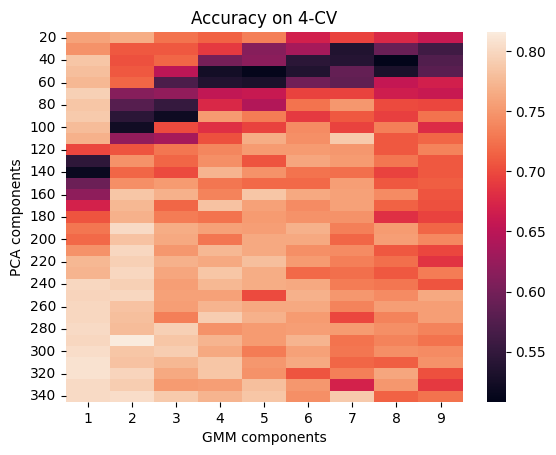

In [9]:
import seaborn as sns

sns.heatmap(accuracy_df)
plt.title("Accuracy on 4-CV")
plt.ylabel("PCA components")
plt.xlabel("GMM components")
plt.savefig("./alzheimer_acc.png")

In [8]:
Xfull = alzheimer_df.drop(columns=[target])

np.linalg.det(Xfull.T @ Xfull)

-0.0

In [9]:
pca = PCA(n_components=pca_c)
X = pca.fit_transform(alzheimer_df.drop(columns=[target]))

NameError: name 'pca_c' is not defined